## Table of Contents

1. How to load an image?<br>
2. How to visualize an image?<br> 
3. How computers see an image?<br>
4. Image manipulation
 - Resizing images<br>
 - Color manipulation<br>
 - Reshape images<br>
 - Rotation<br>
 - Crop<br>
 - Flip<br>
 - Brightness<br>
 - Save image to disk<br>
5. How to deal with multiple images?<br>

## How to load an image?
- When we are working with images, the first step is to load the image into our program. This makes the image data available for processing, skimage supports all major image formats like jpg,png,etc.
- Let's import the necessary sub-modules of skimage **imshow()** and **imread()** to display and read images.

In [3]:
!pip install scikit-image

  Using cached scikit_image-0.17.2-cp36-cp36m-win_amd64.whl (11.5 MB)
  Using cached networkx-2.5.1-py3-none-any.whl (1.6 MB)


  Using cached PyWavelets-1.1.1-cp36-cp36m-win_amd64.whl (4.2 MB)
  Using cached imageio-2.14.0-py3-none-any.whl (3.3 MB)
  Using cached tifffile-2020.9.3-py3-none-any.whl (148 kB)


In [4]:
# importing modules from skimage to read and display images
from skimage.io import imshow, imread, imsave

# reading the image using its path
image = imread('datasets\\kodi-02.jpg')

Image is a multidimensional array consisting of the pixel values. Let's see the shape of this image

In [5]:
image.shape

(538, 720, 3)

## How to visualize an image?

We can use the **imshow()** of skimage to visualize an image.

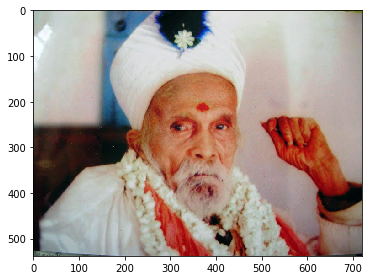

In [6]:
# plotting the image
imshow(image)

## How computers see an image?

- Computers see images as grid of numbers , where each number represents the pixel intensity at that location in image. 
- Grayscale images have only single value for every pixel location that represents the intensity of black at that location.
- While color images like RGB have 3 values for every pixel representing the intensity of red, green and blue channels respectively at that location.

In [7]:
# image is a multidimensional array consisting of the pixel values
print(image)

[[[ 99  98 130]
  [127 128 156]
  [132 134 155]
  ...
  [101 115  20]
  [103 116  24]
  [108 121  31]]

 [[117 121 148]
  [154 159 181]
  [171 177 193]
  ...
  [105 117  17]
  [107 119  21]
  [111 122  26]]

 [[119 127 148]
  [157 166 183]
  [172 182 192]
  ...
  [109 122  16]
  [112 125  20]
  [114 126  24]]

 ...

 [[ 83 105  84]
  [ 71  93  70]
  [ 77 100  74]
  ...
  [  0   5   1]
  [  0   5   0]
  [  0   5   0]]

 [[ 76  98  75]
  [ 73  95  72]
  [ 77  99  76]
  ...
  [  1   7   3]
  [  2   8   4]
  [  2   8   4]]

 [[ 76  98  75]
  [ 73  95  72]
  [ 77  99  76]
  ...
  [  1   7   3]
  [  2   8   4]
  [  2   8   4]]]


In [8]:
# Red channel of image
print(image[:,:,0].shape)

(538, 720)


In [9]:
# Green channel of image
print(image[:,:,1].shape)

(538, 720)


In [10]:
# Blue channel of image
print(image[:,:,2].shape)

(538, 720)


## Resizing Images

Resizing images is the most basic operation where we reduce the size of the image to smaller dimensions. This makes it easier to load them into memory and fewer computations are required to process them.

Original Image dimensions are  (538, 720, 3)


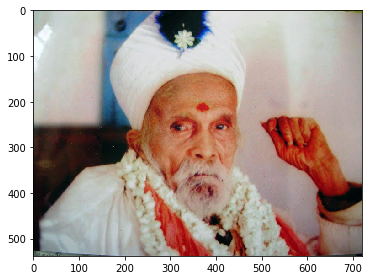

In [11]:
# show the image size
print('Original Image dimensions are ',image.shape)
# get image shape
height, width, channels = image.shape

# show image
imshow(image);

Resized Image dimensions   (269, 360, 3)


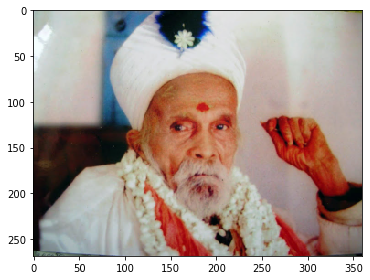

In [12]:
from skimage.transform import resize

# resize image to required dimensions
resized = resize(image,(height/2,width/2))
# show to new image size
print('Resized Image dimensions  ', resized.shape)

# plot original and resized images
imshow(resized);

## Color manipulation
- Most of the images that we see are composed of 3 channels or components, the red , green and blue channels. 
- Thus every image in computers is a multidimensional(generally 3 dimensions) array consisting of the pixel values of corresponding channels.

In [13]:
# reading the image
image = imread('datasets\\kodi-02.jpg')

image.shape

(538, 720, 3)

In case of grayscale images only one channel is present that represents the intensity of black at particular pixel location, this helps to reduce the memory requirements of the image.

In [14]:
# import color sub-module
from skimage import color

# converting image to grayscale
grayscale_image = color.rgb2gray(image)
grayscale_image.shape

(538, 720)

- Notice that the third dimension is now missing from the image shape.
- Let's see how a gray scale image looks like!

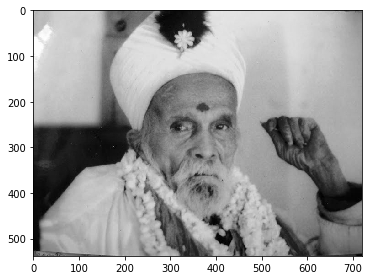

In [15]:
# displaying grayscale image
imshow(grayscale_image)

- Let's also have a look at different colour channels of our image, starting with **red**

E:\Anaconda3\envs\ml_3.6\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


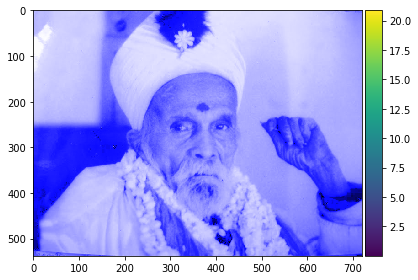

In [22]:
from skimage import color

# convert back to rgb
image2 = color.gray2rgb(grayscale_image)

# red filter [R,G,B]
red_filter = [1,1,21]
imshow(image2*red_filter)

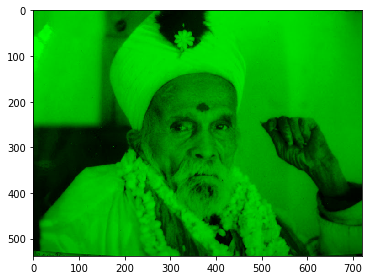

In [23]:
image2 = color.gray2rgb(grayscale_image)

# green filter
green_filter = [0,1,0]

imshow(image2*green_filter)

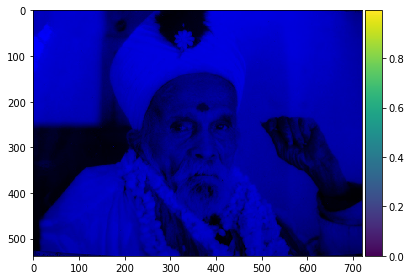

In [24]:
image2 = color.gray2rgb(grayscale_image)

# blue filter
blue_filter = [0,0,1]
imshow(image2*blue_filter)

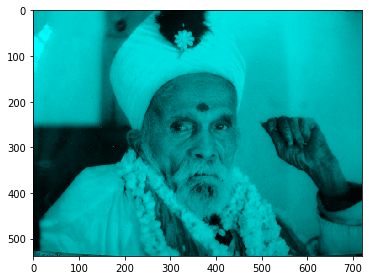

In [25]:
image2 = color.gray2rgb(grayscale_image)

# blue green filter
blue_green_filter = [0,1,1]
imshow(image2*blue_green_filter)

## Reshaping image

- Sometimes you need to reshape an existing image in order to use it in your model.
- Images by default come in 3-Dimensions (height, width, channel) if color else 2-Dimensions if only grayscale and in order to use it in a ML model, we convert it to 1-Dimension.
- You can use numpy's **reshape()** and pass the required shape.
- If converting a 4 by 4 2-D image to 1-D, we will have 4x4=16 values.

In [26]:
# import color sub-module
from skimage import color

# reading the image
image = imread('datasets\\kodi-02.jpg')

# converting image to grayscale
grayscale_image = color.rgb2gray(image)
grayscale_image.shape

(538, 720)

In [27]:
import numpy as np

new_shape = (grayscale_image.shape[0]*grayscale_image.shape[1])

# reshape 
image2 = np.reshape(grayscale_image, new_shape)
image2.shape

(387360,)

## Image Rotation
Image rotation can help our model become robust to changes in object orientation, this is because even if the image is rotated it contains the same information and should generate the same results.

Original Image


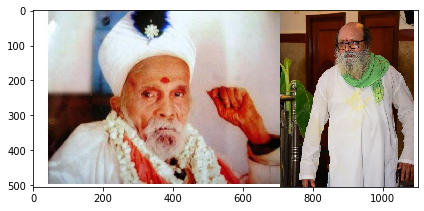

In [29]:
# import required libraries
from skimage.transform import rotate

# read the image
image = imread('datasets\\Kodi-18.jpg')
print('Original Image')
# show original image
imshow(image);

Rotated Image


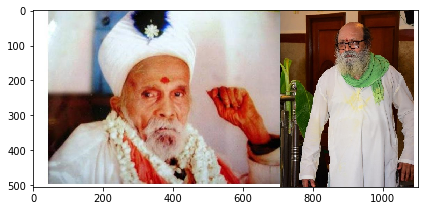

In [33]:
print('Rotated Image')
# rotating the image by 180 degrees
rotated = rotate(image,360,resize=True)

# plot the rotated image
imshow(rotated);

### Image Cropping
In image cropping we only use a part of an image as data sample, this can help us to focus only on important parts of the image thus helps extract relevant parts of the image.

Text(0.5, 1.0, 'Original Image')

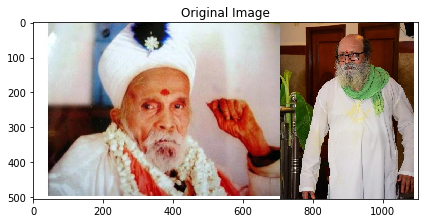

In [44]:
# importing plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# reading the image
image = imread('datasets\\Kodi-18.jpg')

# selecting part of the image only 
cropped1 = image[0:500,0:700]
cropped2 = image[0:500,700:1250]

# plot original and cropped images
imshow(image)
plt.title('Original Image')

Text(0.5, 1.0, 'Cropped Image')

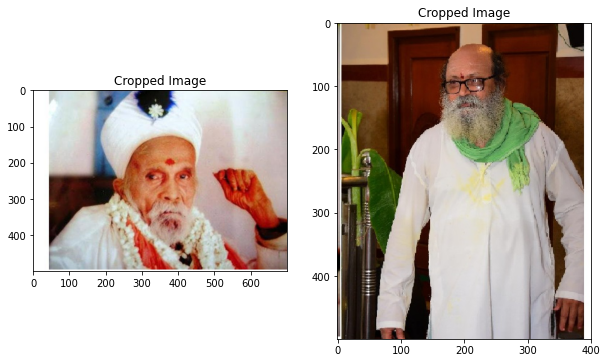

In [45]:
# matplotlib code to display
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,10))
ax[0].imshow(cropped1)
ax[0].set_title('Cropped Image')
ax[1].imshow(cropped2)
ax[1].set_title('Cropped Image')

### Flipping
Flipping can thought of as extension of rotation, it allows left-right as well up-down flipping of images.

Text(0.5, 1.0, 'Original Image')

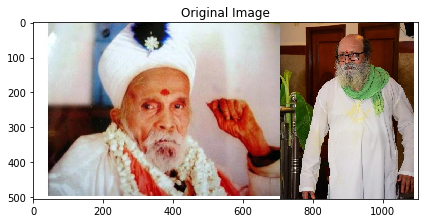

In [46]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# reading the image
image = imread('datasets\\Kodi-18.jpg')
image = np.array(image)

imshow(image)
plt.title('Original Image')

Text(0.5, 1.0, 'Left to Right Flipped')

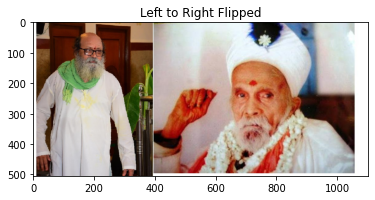

In [47]:
# flip image left-to-right
flipLR = np.fliplr(image)

plt.imshow(flipLR)
plt.title('Left to Right Flipped')

Text(0.5, 1.0, 'Up Down Flipped')

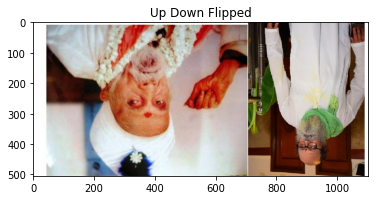

In [48]:
# flip image up-to-down
flipUD = np.flipud(image)

plt.imshow(flipUD)
plt.title('Up Down Flipped')

### Brightness Manipulation
Images with different brightness can be used to make the model robust to changes in lightning conditions, this is important for systems that work in outdoor lighting, like CCTV cameras on traffic signals.

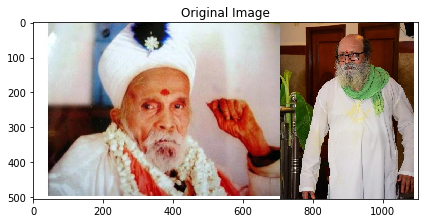

In [49]:
# import required libraries
from skimage.exposure import adjust_gamma

# read the image
image = imread('datasets\\Kodi-18.jpg')

plt.title('Original Image')
imshow(image)

Text(0.5, 1.0, 'Brightened IMage')

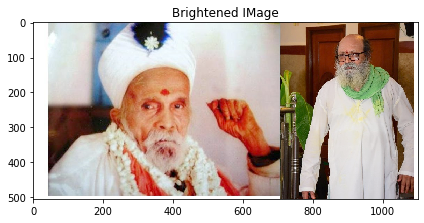

In [53]:
# brighten the image
bright = adjust_gamma(image,gamma=0.8,gain=1)

imshow(bright)
plt.title('Brightened IMage')

Text(0.5, 1.0, 'Darkened Image')

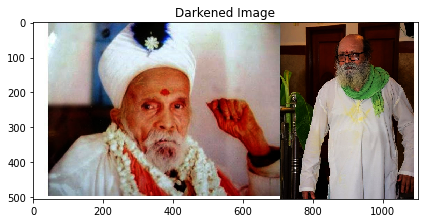

In [54]:
# darken the image
dark = adjust_gamma(image,gamma=1.5,gain=1)

imshow(dark)
plt.title('Darkened Image')

### Saving image to disk

- You can use skimage's **imsave()**

In [55]:
# saving the darkened image
imsave('Kodi.jpg', dark)

## How to deal with multiple images?
- When dealing with multiple images, we can create an list of images and then process individual images as the list elements.

In [65]:
# glob is used to access multiple images from a folder
import glob

# IMAGES is an array of images
IMAGES = []

# folder's path
path = 'datasets//*.jpg'

# reading images and appending them to the IMAGES array
for img in glob.glob(path):
    IMAGES.append(imread(img))    
    print(img)

datasets\kodi-02.jpg
datasets\Kodi-18.jpg
datasets\sayi4.jpg


In [66]:
import numpy as np
IMAGES = np.array(IMAGES)
IMAGES.shape

E:\Anaconda3\envs\ml_3.6\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


(3,)

- As we can see from the shape of the IMAGES array , it consists of 7 images of shape 720x1280 and having 3 channels each. Let's now plot them together.
- You can use matplotlib also to visualize images, it gives greater control over your visualization.  

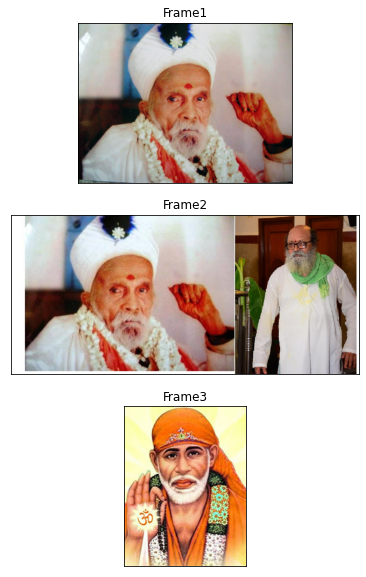

In [67]:
# importing plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# image titles
image_titles = ['Frame1', 'Frame2', 'Frame3']

# plotting multiple images using subplots
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(15,10))
for i in range(3):
    ax[i].imshow(IMAGES[i])
    ax[i].set_title(image_titles[i])    
    ax[i].set_xticks([])
    ax[i].set_yticks([])